<a href="https://colab.research.google.com/github/Farnaaaz/Student-Grade-Analysis-/blob/main/Dataset_fundamental_analysis_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib as plt

In [10]:
#df = pd.read_csv("C:/Users/Farnaz/Desktop/Dataset.csv")

In [3]:
from google.colab import files
df = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
df=pd.read_csv('Dataset.csv')

In [ ]:
df.head(5)

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'F' else x)
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'M' else x)

In [ ]:
df.head(5)

,student_id,sex,age,failures,Dalc,Walc,G1,G2,G3
0,1,1,18,0,1,1,0,11,11
1,2,1,17,0,1,1,9,11,11
2,3,1,15,0,2,3,12,13,12
3,4,1,15,0,1,1,14,14,14
4,5,1,16,0,1,2,11,13,13


In [ ]:
X = df.drop(['G3'], axis=1).values
y = df['G3'].values

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(519, 8)

In [ ]:
male =  df['sex']==0
dfmale = df[male]
female =  df['sex']==1
dffemale = df[female]

In [ ]:
female =  df['sex']==1
dffemale = df[female]

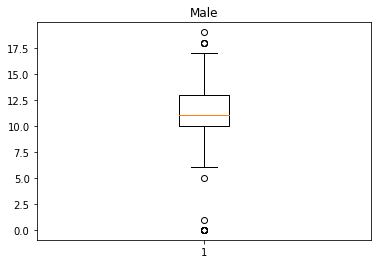

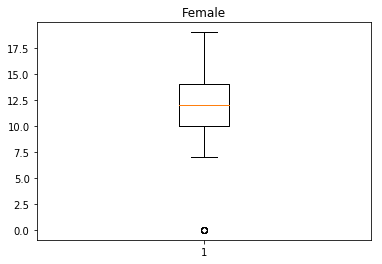

In [ ]:
plt.boxplot(dfmale['G3'])
plt.title('Male')

plt.show()
plt.boxplot(dffemale['G3'])
plt.title('Female')
plt.show()

In [ ]:
dffemale.describe()

,student_id,sex,age,failures,Dalc,Walc,G1,G2,G3
count,383.000000,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,342.584856,1.0,16.788512,0.185379,1.284595,1.937337,11.637076,11.822454,12.253264
std,184.256813,0.0,1.175524,0.516325,0.659166,1.059112,2.794232,2.967506,3.124147
min,1.000000,1.0,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,194.000000,1.0,16.000000,0.000000,1.000000,1.000000,10.000000,10.000000,10.000000
50%,359.000000,1.0,17.000000,0.000000,1.000000,2.000000,12.000000,12.000000,12.000000
75%,493.500000,1.0,18.000000,0.000000,1.000000,3.000000,14.000000,14.000000,14.000000
max,647.000000,1.0,21.000000,3.000000,5.000000,5.000000,19.000000,19.000000,19.000000


In [ ]:
dfmale.describe()

,student_id,sex,age,failures,Dalc,Walc,G1,G2,G3
count,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,299.680451,0.0,16.680451,0.274436,1.815789,2.774436,11.056391,11.206767,11.406015
std,189.555785,0.0,1.276550,0.686710,1.139304,1.414835,2.640865,2.800019,3.320690
min,6.000000,0.0,15.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000
25%,139.500000,0.0,16.000000,0.000000,1.000000,1.000000,9.000000,9.000000,10.000000
50%,281.500000,0.0,17.000000,0.000000,1.000000,3.000000,11.000000,11.000000,11.000000
75%,466.500000,0.0,18.000000,0.000000,2.000000,4.000000,13.000000,13.000000,13.000000
max,649.000000,0.0,22.000000,3.000000,5.000000,5.000000,18.000000,18.000000,19.000000


In [ ]:
a = df['G3'].values
b = df['Dalc'].values
import scipy 
z = scipy.stats.pearsonr(a, b)
z

(-0.20471939724815674, 1.4320359116843908e-07)

In [ ]:
a = df['G3'].values
b = df['G1'].values
scipy.stats.spearmanr(a, b)

SpearmanrResult(correlation=0.8832876374956353, pvalue=4.987374514661001e-215)

In [ ]:
import numpy as np
numpy.corrcoef(a, b)[0, 1]

0.8263871247890474

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.train import AdamOptimizer


from sklearn.preprocessing import OneHotEncoder

In [ ]:
model = Sequential()

model.add(Dense(50, input_shape=(8,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=AdamOptimizer(0.01),
             loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
h = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2)

Train on 519 samples, validate on 130 samples
Epoch 1/100
519/519 [==============================] - 0s 329us/sample - loss: 106.7151 - mean_absolute_error: 6.7908 - val_loss: 29.1893 - val_mean_absolute_error: 4.0679
Epoch 2/100
519/519 [==============================] - 0s 102us/sample - loss: 4.7572 - mean_absolute_error: 1.6638 - val_loss: 8.7559 - val_mean_absolute_error: 1.9000
Epoch 3/100
519/519 [==============================] - 0s 101us/sample - loss: 3.1283 - mean_absolute_error: 1.2938 - val_loss: 7.3162 - val_mean_absolute_error: 2.0334
Epoch 4/100
519/519 [==============================] - 0s 101us/sample - loss: 2.5780 - mean_absolute_error: 1.2141 - val_loss: 5.8069 - val_mean_absolute_error: 1.5140
Epoch 5/100
519/519 [==============================] - 0s 97us/sample - loss: 1.6376 - mean_absolute_error: 0.9156 - val_loss: 5.1343 - val_mean_absolute_error: 1.4646
Epoch 6/100
519/519 [==============================] - 0s 103us/sample - loss: 1.9061 - mean_absolute_error

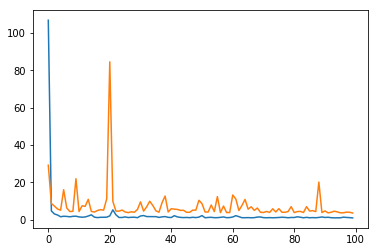

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

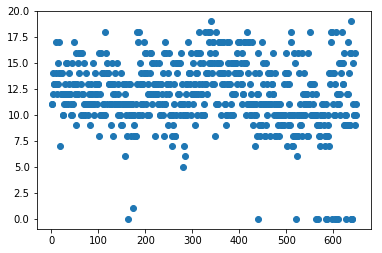

In [ ]:
plt.scatter(x=df['student_id'],y=df['G3'])
plt.show()

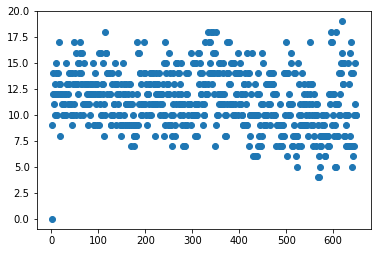

In [ ]:
plt.scatter(x=df['student_id'],y=df['G1'])
plt.show()

In [ ]:
X = df.drop(['G3'], axis=1).values
y = df['G3'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = df[['G1','failures']].values
y = df['G3'].values

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)


0.6896579574709202

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0) 
clf = clf.fit(X, y)
clf.score(X, y)

0.37750385208012327

In [ ]:
clf.predict(np.array([[12, 0]]))

array([12])